# Assignment 2

This is the first of two mandatory assignments which must be completed during the course. First some practical information:

* When is the assignment due?: **23:59, Friday, August 24, 2018**
* How do you grade the assignment?: You will **peergrade** each other as primary grading. 
* Must I hand-in as a group?: **yes**

The assigment consist of one to three problems from each of the exercise sets you have solved so far (excluding Exercise Set 1). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


## Problems from exercise set 11

> **_Hint:_** you can get data by running 

```python
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac = 1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))

# A very simple deterministic test-train split 
Xtrain = X[:70]
ytrain = y[:70]

Xtest = X[70:]
ytest = y[70:]
```

> The following code gives you the required functions to work with:

```python
def random_weights(location = 0.0, scale = 0.01, seed = 1):
    # Init random number generator
    rgen = np.random.RandomState(seed)
    w = rgen.normal(loc=location, scale=scale, size= 1 + X.shape[1])    
    return w

def net_input(X, W): 
    return np.dot(X, W[1:]) + W[0]   # Linear product X'W + bias


def predict(X, W):
    linProd = net_input(X, W)
    return np.where(linProd >= 0.0, 1, -1)    # 1(linProd > 0)
```


> **Ex. 11.1.5:** Write a function whichs loops over the training data (both X and y) using `zip`. For each row in the data, update the weights according to the perceptron rule (remember to update the bias in `w[0]`!). Set $\eta = 0.1$.
>
> Make sure the loop stores the total number of prediction errors encountered underways in the loop by creating an int which is incremented whenever you update the weights. 
>
>> _Hint:_ your function should return the updated weights, as well as the number of errors made by the perceptron.
>
>> _Hint:_ The following code block implements the function in _pseudo_code (it wont run, but serves to communicate the functionality).
>> ```
>> function f(X, y, W, eta):
>>    set errors = 0
>>
>>    for each pair xi, yi in zip(X,y) do:
>>        set update = eta * (yi - predict(xi, W))
>>        set W[1:] = W[1:] + update * xi
>>        set W[0] = W[0] + update
>>        set errors = errors + int(update != 0) 
>>
>>    return W, errors
>> ```
>
> *Bonus:* If you completed the previous bonus assignment, calculate the accuracy on training data using the updated weights. Any progress yet?

In [2]:
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac = 1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))

# A very simple deterministic test-train split 
X_train = X[:70]
y_train = y[:70]

X_test = X[70:]
y_test = y[70:]

def rand_ws(seed = 5):
    rgen = np.random.RandomState(seed)
    w_init = rgen.normal(size = (1 + X.shape[1]), loc = 0, scale = 0.01) # mean is loc = ..
    return w_init

def net_input(X, W):
    return W[0] + np.dot(X, W[1:])
    

def predict(X, W):
    return np.where( net_input(X, W) >= 0.0, 1, -1)

# Bonus: 
def accu(X, y, W):
    print("accuracy is:")
    return np.mean(y == predict(X, W))

accu(X_train, y_train, rand_ws(2))

accuracy is:


0.5142857142857142

In [3]:
# [Answer to Ex. 11.1.5]
def trainloop(X, y, W, eta = 0.1):
    e = 0
    
    for x_i, y_i in zip(X, y):
        update = eta * (y_i - predict(x_i, W))
        W[1:] += update * (x_i)
        W[0]  += update
        e += int(update != 0.0)
    
    return W, e

print(trainloop(X_train, y_train, rand_ws(10)))

accu(X_train, y_train, trainloop(X_train, y_train, rand_ws())[0])

(array([-0.58668413, -2.01284721, -1.055454  ,  0.83991616,  1.24621336]), 33)
accuracy is:


0.45714285714285713

> **Ex. 11.1.6:** Write a function which repeat the updating procedure you constructed in 11.1.5 for `n_iter` times by packing the whole thing in an outer loop. Make sure you store the number of errors in each iteration in a list. 
>
> Plot the total errors after each iteration in a graph.
>
>> _Hint:_ Make sure you dont reset the weights after each iteration.
>
>> _Hint:_ Once again some pseudocode:
>> ```
>> function g(X, y, n_iter):
>>     set eta = 0.1
>>     set weights = random_weights()
>>     set errorseq = list()
>>
>>     for each _ in range(n_iter):
>>         weights, e = f(X, y, W, eta) 
>>         errorseq.append(e)
>>
>>     return weights, errorseq
>> ```
>
>> _Bonus:_ Wrap the code in a function called Perceptron.

weights: [-15.80416758 -12.62056267 -12.52136196  16.01640271  23.48206564]
accuracy is:
0.7428571428571429


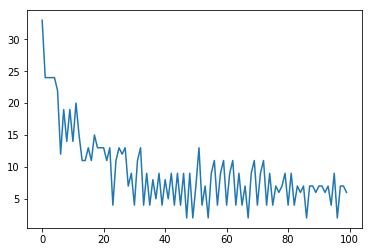

In [4]:
# [Answer to Ex. 11.1.6]
def HomemadePerceptron(X = X_train, y = y_train, n_iter = 100, seed = 2):
    eta = 0.1
    W = rand_ws(seed)
    eseq = list()
    
    for i in range(n_iter):
        W, e = trainloop(X, y, W, eta)
        eseq.append(e)
    
    return W, eseq


print("weights: " + str(HomemadePerceptron(X_train, y_train, 100)[0]))

print(accu(X_train, y_train, HomemadePerceptron()[0]))

plt.plot(HomemadePerceptron()[1])

## Problems from exercise set 12
>Get the required data by running 

```python
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)
```

> **Ex. 12.2.0:** Load the california housing data with scikit-learn using the code above. Inspect the data set. 

In [5]:
# [Answer to Ex. 12.2.0]
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)


print(X.head(3))
print(y[:3])

# print(X_train.head(5))
X_train.describe()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260
[4.526 3.585 3.521]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000
mean,3.874334,28.506977,5.448060,1.098334,1426.466860,3.046432
std,1.875069,12.638869,2.710030,0.543761,1098.387561,7.727201
min,0.499900,1.000000,0.888889,0.333333,5.000000,1.060606
25%,2.579425,18.000000,4.462767,1.006410,787.750000,2.428799
50%,3.549850,29.000000,5.235723,1.048780,1162.500000,2.822316
75%,4.736450,37.000000,6.070853,1.098592,1726.250000,3.281516
max,15.000100,52.000000,141.909091,34.066667,16305.000000,599.714286


> **Ex.12.2.1**: Generate interactions between all features to third degree, make sure you **exclude** the bias/intercept term. How many variables are there? Will OLS fail? 
>
> After making interactions rescale the features to have zero mean, unit std. deviation. Should you use the distribution of the training data to rescale the test data?  
>
>> *Hint 1*: Try importing `PolynomialFeatures` from `sklearn.preprocessing`
>
>> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [6]:
# [Answer to Ex. 12.2.1]
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

interaction = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)

# Transform feature matrix
X_IV_train = interaction.fit_transform(X_train)
X_IV_test = interaction.fit_transform(X_test) 
print("The IV transformer is not based on either train or test, so we apply it to both")
print(X_IV_train.shape)
print(X_train.shape)
print("Creating 3rd order interactive features increased the number of features from 6 to 41")

scaler = StandardScaler().fit(X_IV_train) # 
# default StandardScaler(copy=True, with_mean=True, with_std=True)
print("Both train and test data are then regularized w. Standardscaler fitted on X_train")
X_IV_train = scaler.transform(X_IV_train)
X_IV_test = scaler.transform(X_IV_test)

The IV transformer is not based on either train or test, so we apply it to both
(10320, 41)
(10320, 6)
Creating 3rd order interactive features increased the number of features from 6 to 41
Both train and test data are then regularized w. Standardscaler fitted on X_train


> **Ex.12.2.2**: Estimate the Lasso model on the train data set, using values of $\lambda$ in the range from $10^{-4}$ to $10^4$. For each $\lambda$  calculate and save the Root Mean Squared Error (RMSE) for the test and train data. 
>
>> *Hint*: use `logspace` in numpy to create the range.


In [7]:
# [Answer to Ex. 12.2.2]
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse

perform_train = []
perform_test = []

lambdas = np.logspace(-4, 4 , 100)

for lambda_ in lambdas:
    lasso1 = Lasso(alpha = lambda_ , random_state=100, max_iter= 5000)
    lasso1.fit(X_IV_train, y_train)
    
    rmse_train = mse(lasso1.predict(X_IV_train), y_train) ** (1/2)
    rmse_test = mse(lasso1.predict(X_IV_test), y_test) ** (1/2)

    perform_train.append(rmse_train)
    perform_test.append(rmse_test)
    
    perform = pd.DataFrame([perform_train, perform_test]).T
    

> **Ex.12.2.3**: Make a plot with on the x-axis and the RMSE measures on the y-axis. What happens to RMSE for train and test data as $\lambda$ increases? The x-axis should be log scaled. Which one are we interested in minimizing? 

> Bonus: Can you find the lambda that gives the lowest MSE-test score?

the smallest RMSE_test occurs lambda with index: 25
 which has a value of 0.010476157527896652


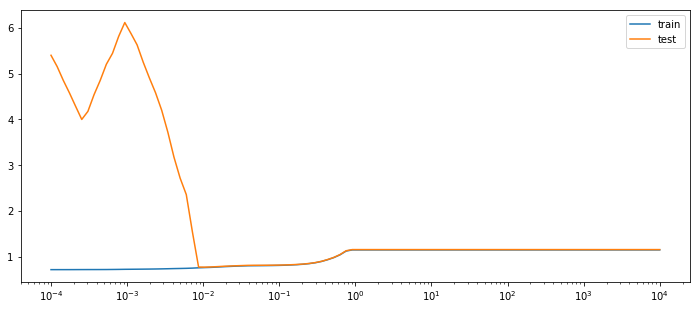

In [8]:
# [Answer to Ex. 12.2.3]
perform.columns = ['train', 'test']
fig, ax = plt.subplots()
plt.plot(lambdas, perform)
fig.set_size_inches(12,5)
ax.set_xscale('log')
plt.legend(perform)

print("the smallest RMSE_test occurs lambda with index: " + str(pd.DataFrame(perform['test'].nsmallest(1)).index.values[0]))
print(" which has a value of "+ str(lambdas[25]))


## Problems from exercise set 13

> **Ex. 13.1.3:**
Run a Lasso regression using the Pipeline from `Ex 13.1.2`. In the outer loop searching through the lambdas specified below. 
In the inner loop make 5 fold cross validation on the selected model and store the average MSE for each fold. Which lambda gives the lowest test MSE?
>
> ```python 
lambdas =  np.logspace(-4, 4, 12)
```
>
>> *Hint:* `KFold` in `sklearn.model_selection` may be useful.
>
> This code will give you the required data: 

In [9]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

In [11]:
# [Answer to Ex. 13.1.3]

# splitting into development (2/3) and test data (1/3)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=1)
# splitting development into train (1/3) and validation (1/3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=1)


from sklearn.model_selection import KFold

# For some reason, X_dev was a df and had to be an array
X_dev = np.array(X_dev)

lambdas =  np.logspace(-4, 4, 12)
print(lambdas)
print('------')
kfolds = KFold(n_splits = 5)
mseCV = []

# For each lambda a model is fitted for each of the K=5 folds. The models are used to predict
# the valuation set of y's using the valuation set of X's. The mean squared errors are calculated
# and appended to MSECV.
for lambda_ in lambdas:
    pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=lambda_, random_state=1))    
    mseCV_ = []
    
    for train_idx, val_idx in kfolds.split(X_dev, y_dev):
        X_train, y_train = X_dev[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 
        pipe_lassoCV.fit(X_train, y_train)
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))    
    mseCV.append(mseCV_)

# Printing first list of MSE's in mseCV
print(mseCV[0])

# Creating data frame containing smallest average MSE and corresponding lambdas
optimalCV = pd.DataFrame(mseCV, index=lambdas).mean(axis=1).nsmallest(1)
optimalCV = pd.DataFrame(optimalCV, columns=['MSE'])
optimalCV.index.name = 'Lambda'

print(optimalCV)



[1.00000000e-04 5.33669923e-04 2.84803587e-03 1.51991108e-02
 8.11130831e-02 4.32876128e-01 2.31012970e+00 1.23284674e+01
 6.57933225e+01 3.51119173e+02 1.87381742e+03 1.00000000e+04]
------
[0.5092446353688973, 250.88583167949565, 0.4865182754955409, 5.805542449920138, 0.5961916384957584]
               MSE
Lambda            
0.015199  0.644969


## Problems from exercise set 14

> **Ex. 14.1.3**: Train a decision tree classifier on **all** of the titanic data.
>
>* If your feature matrix is `X` and your target array is `y` you can do this by instantiating a model like:
>
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier()
        model.fit(X, y)  # <--- This is the training/fitting/learning step
>       
>Write four functions that counts the number of ..
 - true positives where we call the function `TP`;
 - true negatives where we call the function `TN`;
 - false positives where we call the function `FP`;
 - false negatives where we call the function `FN`.

> All of these functions should take three arguments, the actual y column, the actual X column and a fittedModel object (e.g. `fittedModel = DecisionTreeClassifier.fit(X,y)`)
>
>> _Hint 1:_ use the function `np.where` to compare y and the predicted values. For example `y + prediction == 2` is true only for the True Positives.
>
>> _Hint 2:_ You can check if your result is correct by summing all four functions and checking that the result equals to the number of observations. 
>
> Get the data by running:

In [12]:
rawdata = sns.load_dataset('titanic').sample(frac=1, random_state = 3)

# Feature creation
rawdata['male'] = (rawdata['sex'] == 'male').astype(int)
rawdata['alone'] = rawdata['alone'].astype(int)
rawdata['adult_male'] = rawdata['adult_male'].astype(int)


# The following piece of code (in multiple lines) generates 
# dummies for all of the categorical variables. 
data = pd.get_dummies(rawdata, 
                      columns = ['class', 'sibsp', 'parch', 'deck'], 
                      drop_first=True)\
         .drop(['pclass', 'sex', 'embarked', 'who', 'embark_town', 'alive'], axis = 1)

datclean = data.dropna(axis=0)

y = np.array(datclean['survived'])
X = np.array(datclean.drop(columns=['survived']))

In [13]:
# [Answer to Ex 14.1.3]
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
fittedModel = model.fit(X, y)  # <--- This is the training/fitting/learning step


def TP(X = X, y = y, fitmod = fittedModel):
    n = sum(np.where(y + fitmod.predict(X) == 2, 1, 0))
    return int(n)

def TN(X = X, y = y, fitmod = fittedModel):
    n = sum(np.where(y + fitmod.predict(X) == 0, 1, 0))
    return int(n)

def FP(X = X, y = y, fitmod = fittedModel):
    n = sum(np.where((fitmod.predict(X) == 1) & (y == 0), 1, 0))
    return int(n)

def FN(X = X, y = y, fitmod = fittedModel):
    n = sum(np.where((fitmod.predict(X) == 0) & (y == 1), 1, 0))
    return int(n)

        
len(X) == (FN()+FP()+TP()+TN()) 

True

> **Ex. 14.1.4:** Combine the four functions you defined above to write your own accuracy function, which calculates
$$
ACC = \frac{TP + TN}{TP+ TN + FP + FN}
$$
>
> Test the accuracy of your model using the `A` function. Report the accuracy of your model on the same data that you trained the model on.
>
>> _Note:_ The reason we want to split the calculation of accuracy into these four components, is that we can then easily calculate other scores, such as the _precision, recall and f1_.

In [14]:
# [Answer to Ex 14.1.4]
def accu(X, y, fitmod):
    acc = (TP(X, y, fitmod)+TN(X, y, fitmod))/ \
    (TP(X, y, fitmod)+TN(X, y, fitmod)+FP(X, y, fitmod)+FN(X, y, fitmod))
    return acc

accu(X, y, fittedModel)

0.9901960784313726

## Problems from exercise set 15 

> **Ex. 15.1.1:** 
Import the Counter object from the builtin package collections (Hint1). This is essentially a dictionary designed for keeping counts, same syntax, but extra functionality. We don't have to initialize each key. We can write: 

```python
c = Counter()
# then we can do this
c['hej']+=1
# without first defining c['hej'] = 0
```


>* Initialize a Counter object and assign it to the variable `dc` (document count).
>* Define a list named `text_counts`. In this container we will store each document after we have converted it to counts of tokens.
>* Run through all tokenized texts and
    * initialize a Counter object with the tokenized text as input, assign this object to a variable `c_t`. >This will now contain a count of each token in the document. Append `c_t` to our list `text_counts`.
    * run though each key in the `c_t` and increment the document count variable `dc` by one. (Hint2)

(hint1: from ... import ...)

(hint2: dc[token]+=1)

> Run the following code to get the data:

In [15]:
import nltk
nltk.download('punkt')
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv')
import re
token_re = re.compile('\w+')

tokenized = df.reviewBody.apply(nltk.word_tokenize)

# tokenized

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karlbindslev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# [Answer to Ex. 15.1.1]
from collections import Counter

dc = Counter()

text_counts = []

for i in tokenized:
    c_t = Counter(i)
    text_counts.append(c_t)
    for token in c_t:
        dc[token]+=1
        
print(text_counts[0:100])


[Counter({'.': 2, 'Lots': 1, 'of': 1, 'inventory': 1, ',': 1, 'very': 1, 'fast': 1, 'and': 1, 'efficient': 1, 'I': 1, 'would': 1, 'recommend': 1, 'this': 1, 'company': 1}), Counter({'and': 4, '.': 4, 'was': 4, 'to': 4, 'I': 3, 'did': 3, 'map': 3, 'me': 3, 'the': 2, 'emailed': 2, 'an': 2, 'review': 2, 'my': 2, 'a': 2, 'not': 1, 'received': 1, 'had': 1, 'ordered': 1, 'paid': 1, 'for': 1, 'within': 1, 'stated': 1, 'delivery': 1, 'time': 1, 'Mapscompany': 1, 'their': 1, 'only': 1, 'first': 1, 'response': 1, 'send': 1, 'invitation': 1, 'experience': 1, '!': 1, 'My': 1, 'initial': 1, 'therefore': 1, 'extremely': 1, 'negative': 1, 'Since': 1, 'then': 1, 'support': 1, 'team': 1, 'member': 1, 'reassuring': 1, 'but': 1, 'ultimately': 1, "n't": 1, 'provide': 1, 'with': 1, 'any': 1, 'concrete': 1, 'information': 1, 'as': 1, 'where': 1, 'The': 1, 'eventually': 1, 'arrive': 1, 'is': 1, 'great': 1, ',': 1, 'so': 1, 'good': 1, 'end': 1, 'imperfect': 1, 'start': 1}), Counter({'I': 4, '.': 4, 'a': 3, 'a

> **Ex. 15.1.2:** 
Now we define the the inverse document frequency variable `idf` as a dictionary with the tokens as keys and idf weights as values. We do this by running through both the token and the value (document count) in the `dc` variable and calculate the ratio between number documents and the token document counts. 

>Use the `np.log` function for the log transform.

>We can iterate through this using the `.items()` syntax we know from the dictionary. 


In [17]:
# [Answer to Ex. 15.1.2]
import numpy as np
idf = {}
N = len(data)

for key, value in dc.items():
    idf[key] = np.log(value/N)

print(idf)


{'Lots': -3.7966121539168185, 'of': 1.0724595758576505, 'inventory': -3.7966121539168185, ',': 1.5047007216110169, 'very': 0.7142473526000317, 'fast': -0.26292558920858394, 'and': 1.9422156624821834, 'efficient': -1.8578704943401174, '.': 2.1364284730534466, 'I': 1.7470015685865614, 'would': 0.2664137250478551, 'recommend': -0.1420653788833873, 'this': 0.4155154439616658, 'company': -0.21170529018586026, 'did': -0.16960810352096944, 'not': 0.42289555125928835, 'received': -0.4608425775771182, 'the': 1.739934401363469, 'map': -5.6937321388027, 'had': 0.4287606707116864, 'ordered': -0.2643865098482589, 'paid': -1.61619469489698, 'for': 1.1756287521921258, 'within': -1.4357581527987968, 'stated': -2.921143416562918, 'delivery': -0.6290296234361681, 'time': 0.33213383502261484, 'emailed': -2.8605187947464836, 'Mapscompany': -6.792344427470809, 'their': -0.427593670618898, 'only': -0.5138230033049647, 'first': -0.7332212318890126, 'response': -1.8225311278948086, 'was': 1.3418298446670938, 

> **Ex. 15.1.3:** 
Now we weight the term frequency in each document with the idf value of each token. Here we used our `text_counts` variable that almost holds the frequency, we just need to divide by the number of tokens in the document. 
Define a list container: `tfidf_docs`. 

FIRST LOOP: For each counter in the text_count container:
    * define the variable `doc_n` as sum of all values in the counter - `.values()` .
    * define a dictionary named `tfidf`.
    * SECOND LOOP: run through all tokens, and their counts by using the `.items()` method of the counter.
        * define a value tf as the ratio between the count and the sum.
        * now weight this value with the idf weight found by calling the idf variable with the token as key.
        * assign this weighed term frequency to the tfidf[token].
    * Once outside the second loop. Append the tfidf dictionary to the tfidf_docs list container.

In [18]:
# [Answer to Ex. 15.1.3]
tfidf_docs = []

for counter in text_counts:
    doc_n = sum(counter.values())
    tfidf = {}
    for token, count in counter.items():
        tf = count/doc_n
        tfidf[token] = tf*idf[token]
    tfidf_docs.append(tfidf)

print(tfidf_docs[0:100])


[{'Lots': -0.2531074769277879, 'of': 0.0714973050571767, 'inventory': -0.2531074769277879, ',': 0.10031338144073446, 'very': 0.04761649017333545, 'fast': -0.017528372613905597, 'and': 0.1294810441654789, 'efficient': -0.12385803295600782, '.': 0.28485712974045957, 'I': 0.1164667712391041, 'would': 0.01776091500319034, 'recommend': -0.009471025258892487, 'this': 0.027701029597444384, 'company': -0.014113686012390684}, {'I': 0.05759345830505148, 'did': -0.0055914759402517404, 'not': 0.00464720385999218, 'received': -0.005064204149199102, 'the': 0.038240316513482836, 'map': -0.18770545512536374, 'had': 0.0047116557221064444, 'ordered': -0.0029053462620687795, 'and': 0.08537211703218389, 'paid': -0.017760381262604177, 'for': 0.012918997276836548, 'within': -0.015777562118668098, 'stated': -0.03210047710508702, 'delivery': -0.006912413444353496, 'time': 0.0036498223628858776, '.': 0.09390894387048118, 'emailed': -0.06286854493948316, 'Mapscompany': -0.07464114755462428, 'their': -0.00469883

## Problems from exercise set 16


> **Ex. 16.2.5:** You should now implement it by doing the following:
* Define a maximum number of iterations`max_iter` to 15.
* Use the `initialize_clusters` function to define a variable `centroids`.
* make a `for` loop from 0 to max_iter where you: 
    * copy the current cluster centroids to a new variable: old_centroids. This will be used for checking convergence after the maximization step.
    * define the `cluster_assignment`  by running the `maximize` function
    * define a new (i.e. overwrite) `centroids` variable by running the `update_expectation` function.
    * finally check if old_centroids is equal to new_centroids, using the np.array_equal() function. If they are: break.

Make sure that it works and wrap it around a function `fit_transform()` that takes the data `X` as input, and the number of clusters `k` plus the maximum number of iterations `max_iter`. It should return the cluster assignments and the cluster centroids. 


> The code below will give you the dataset, as well as three functions you need to solve the exercise.

In [19]:
import seaborn as sns 
import pandas as pd 
import random
from sklearn.metrics import pairwise_distances

df = sns.load_dataset('iris')
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values


def initialize_clusters(k,X):
    idx = random.sample(range(len(X)),k)
    centroids = X[idx]
    return centroids

def maximize(centroids,X):
    dist_matrix = pairwise_distances(centroids,X)
    cluster_assignment = dist_matrix.T.argsort(axis=1)[:,0]
    return cluster_assignment


def update_expectation(k,X,cluster_assignment):
    new_centroids = np.zeros((k,len(X[0])))
    for i in range(k):
        subset = X[cluster_assignment==i]
        new_centroids[i] = subset.mean(axis=0)
    return new_centroids


In [20]:
# [Answer to Ex. 16.2.5]

X = df[['sepal_length','sepal_width','petal_length','petal_width']].values

def fit_transform(X, k, max_iter = 15):
    centroids = initialize_clusters(k, X)

    for i in range(0, max_iter):
        old_centroids = centroids.copy()
        cluster_assignment = maximize(centroids, X)
        centroids = update_expectation(k,X,cluster_assignment)
        if np.array_equal(old_centroids, centroids):
            break
    return cluster_assignment, centroids
            
fit_transform(X, 3)

    
 

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]),
 array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
        [5.88360656, 2.74098361, 4.38852459, 1.43442623],
        [5.006     , 3.428     , 1.462     , 0.246     ]]))